In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
import pandas as pd

In [2]:
housing=fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
y=pd.DataFrame(housing.target,columns=housing.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [9]:
X_train_full, X_test,y_train_full,y_test=train_test_split(X,y,random_state=32,test_size=0.2)

In [10]:
X_train, X_valid,y_train_,y_valid=train_test_split(X_train_full,y_train_full,random_state=32,test_size=0.2)

In [22]:
LAYER=[
    tf.keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu",),
     tf.keras.layers.Dense(5, activation="relu",),
     tf.keras.layers.Dense(1)
    
                      ]

In [23]:
model=tf.keras.Sequential(LAYER)

In [24]:
LOSS="mse"
OPTIMIZER="sgd"

model.compile(loss=LOSS,optimizer=OPTIMIZER)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [26]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [27]:

EPOCHS=20


history=model.fit(X_train,y_train_,epochs=EPOCHS,validation_data=(X_valid,y_valid))



Epoch 1/20
413/413 [==============================] - 0s 707us/step - loss: 0.8379 - val_loss: 0.4952
Epoch 2/20
413/413 [==============================] - 0s 576us/step - loss: 0.4429 - val_loss: 0.3900
Epoch 3/20
413/413 [==============================] - 0s 576us/step - loss: 0.3916 - val_loss: 0.3671
Epoch 4/20
413/413 [==============================] - 0s 567us/step - loss: 0.3742 - val_loss: 0.3602
Epoch 5/20
413/413 [==============================] - 0s 579us/step - loss: 0.3627 - val_loss: 0.3628
Epoch 6/20
413/413 [==============================] - 0s 579us/step - loss: 0.3542 - val_loss: 0.3502
Epoch 7/20
413/413 [==============================] - 0s 569us/step - loss: 0.3477 - val_loss: 0.3569
Epoch 8/20
413/413 [==============================] - 0s 580us/step - loss: 0.3444 - val_loss: 0.3596
Epoch 9/20
413/413 [==============================] - 0s 613us/step - loss: 0.3394 - val_loss: 0.3442
Epoch 10/20
413/413 [==============================] - 0s 584us/step - loss: 0.336

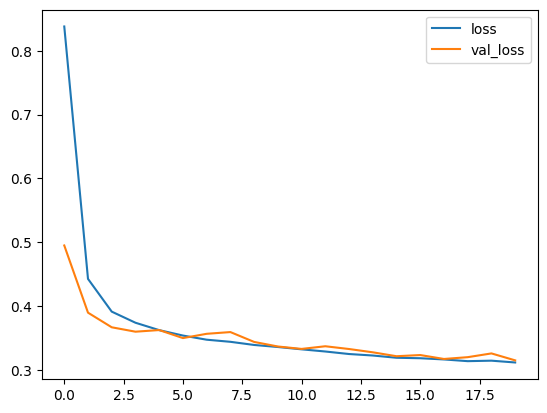

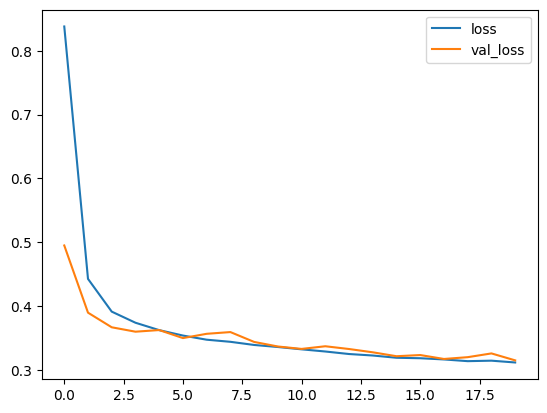

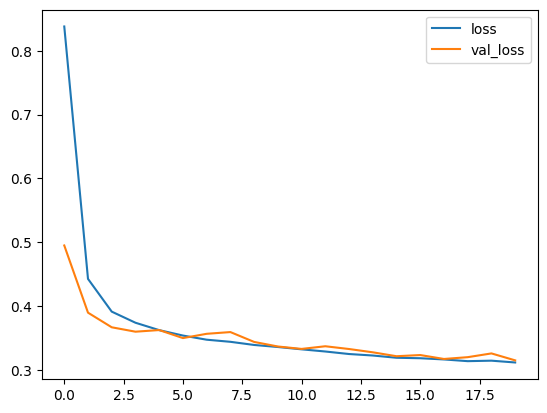

In [31]:
pd.DataFrame(history.history).plot()
plt.show()